In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('./Landing Page Data.xlsx')

In [3]:
df

,landing_page,user_id,show_date_time,browser_version,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,39.0.2171.65,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,NaN,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,11.0,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,40.0.2214.94,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,11.0,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...,...
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,33.0,Firefox,Windows,DE
15462,na-carnival-info-page,NaN,2015-02-28 23:06:38,40.0.2214.115,Chrome,Windows,TR
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,27.0.1689.76,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,40.0.2214.115,Chrome,Windows,TR


In [4]:
df.isna().sum()

landing_page           0
user_id            13274
show_date_time         0
browser_version      768
browser              152
os_name              278
country                0
dtype: int64

In [5]:
df['browser'].unique()

array(['Chrome', 'AndroidBrowser', 'Microsoft Internet Explorer',
       'Firefox', 'GoogleBot', 'Safari', 'Opera', 'ChromeiOS', nan,
       'BingBot', 'Opera Mobile', 'NintendoBrowser', 'SeaMonkey'],
      dtype=object)

In [6]:
df_os = df[['os_name', 'user_id']]

In [7]:
df_os.groupby(['os_name']).count()

,user_id
os_name,
ChromeOS,1
Linux,101
Macintosh,32
PlayStation,5
Windows,2050
Windows Phone,0
iOS,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15466 entries, 0 to 15465
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   landing_page     15466 non-null  object        
 1   user_id          2192 non-null   float64       
 2   show_date_time   15466 non-null  datetime64[ns]
 3   browser_version  14698 non-null  object        
 4   browser          15314 non-null  object        
 5   os_name          15188 non-null  object        
 6   country          15466 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 845.9+ KB


In [9]:
df['os_name'].value_counts()

Windows          13342
Linux             1225
iOS                320
Macintosh          229
PlayStation         28
Windows Phone       24
ChromeOS            20
Name: os_name, dtype: int64

In [10]:
df_rework = df.drop(df[(df['os_name'] == 'iOS') | (df['os_name'] == 'Windows Phone')].index)

In [11]:
df_rework

,landing_page,user_id,show_date_time,browser_version,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,39.0.2171.65,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,NaN,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,11.0,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,40.0.2214.94,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,11.0,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...,...
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,33.0,Firefox,Windows,DE
15462,na-carnival-info-page,NaN,2015-02-28 23:06:38,40.0.2214.115,Chrome,Windows,TR
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,27.0.1689.76,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,40.0.2214.115,Chrome,Windows,TR


In [12]:
df_lp_br = df_rework[['landing_page', 'user_id', 'browser']]

In [13]:
df_lp_br

,landing_page,user_id,browser
0,lpceuwottvq4,NaN,Chrome
1,lpceuwottvq4,NaN,AndroidBrowser
2,lpceuwottvq4,NaN,Microsoft Internet Explorer
3,lpceuwottvq4,NaN,Chrome
4,lpceuwottvq4,NaN,Microsoft Internet Explorer
...,...,...,...
15461,lpceuwottvq4,526736398.0,Firefox
15462,na-carnival-info-page,NaN,Chrome
15463,lpceuwottvq4,NaN,Opera
15464,lpceuwottvq4,526736924.0,Chrome


In [14]:
df_lp_br_count = df_lp_br.groupby(['landing_page','browser']).count()

In [15]:
df_lp_br_count

user_id
landing_page          browser                             
lpceuwottvq4          AndroidBrowser                    29
                      BingBot                            0
                      Chrome                           877
                      Firefox                          484
                      GoogleBot                          0
                      Microsoft Internet Explorer      290
                      NintendoBrowser                    0
                      Opera                             77
                      Safari                            14
                      SeaMonkey                          1
na-carnival-info-page AndroidBrowser                     0
                      Chrome                             0
                      Firefox                            0
                      Microsoft Internet Explorer        0
                      Opera                              0
                      Safari                             0
woteutvsupport        AndroidBrowser                     5
                      Chrome                           241
                      Firefox                          101
                      GoogleBot                          0
                      Microsoft Internet Explorer       42
                      Opera                             14
                      Opera Mobile                       0
                      Safari                             8

In [16]:
all_lp_br = df_lp_br[['landing_page','browser']].value_counts()

In [17]:
all_lp_br

landing_page           browser                    
lpceuwottvq4           Chrome                         5498
                       Firefox                        3039
                       Microsoft Internet Explorer    2421
woteutvsupport         Chrome                         1055
                       Firefox                         730
lpceuwottvq4           AndroidBrowser                  447
na-carnival-info-page  Chrome                          428
lpceuwottvq4           Opera                           358
woteutvsupport         Microsoft Internet Explorer     296
na-carnival-info-page  Firefox                         138
lpceuwottvq4           Safari                          125
woteutvsupport         AndroidBrowser                   81
na-carnival-info-page  Microsoft Internet Explorer      80
woteutvsupport         Opera                            77
lpceuwottvq4           GoogleBot                        54
                       BingBot                          51
woteu

In [18]:
final_df = pd.concat([df_lp_br_count, all_lp_br], axis=1)

In [19]:
final_df.rename(columns={0: 'all_user'}, inplace=True) # na-carnival-info-page лучше не показывать вообще

In [20]:
final_df

user_id  all_user
landing_page          browser                                       
lpceuwottvq4          AndroidBrowser                    29       447
                      BingBot                            0        51
                      Chrome                           877      5498
                      Firefox                          484      3039
                      GoogleBot                          0        54
                      Microsoft Internet Explorer      290      2421
                      NintendoBrowser                    0         2
                      Opera                             77       358
                      Safari                            14       125
                      SeaMonkey                          1         2
na-carnival-info-page AndroidBrowser                     0         3
                      Chrome                             0       428
                      Firefox                            0       138
                      Microsoft Internet Explorer        0        80
                      Opera                              0        12
                      Safari                             0        11
woteutvsupport        AndroidBrowser                     5        81
                      Chrome                           241      1055
                      Firefox                          101       730
                      GoogleBot                          0        29
                      Microsoft Internet Explorer       42       296
                      Opera                             14        77
                      Opera Mobile                       0         2
                      Safari                             8        34

In [21]:
df_rework

,landing_page,user_id,show_date_time,browser_version,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,39.0.2171.65,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,NaN,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,11.0,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,40.0.2214.94,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,11.0,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...,...
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,33.0,Firefox,Windows,DE
15462,na-carnival-info-page,NaN,2015-02-28 23:06:38,40.0.2214.115,Chrome,Windows,TR
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,27.0.1689.76,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,40.0.2214.115,Chrome,Windows,TR


In [22]:
df_carn = df.loc[df['landing_page'] == 'na-carnival-info-page']

In [23]:
df_carn

,landing_page,user_id,show_date_time,browser_version,browser,os_name,country
6643,na-carnival-info-page,NaN,2015-02-13 05:14:42,41.0.2272.53,Chrome,Windows,CA
6794,na-carnival-info-page,NaN,2015-02-13 12:43:20,40.0.2214.111,Chrome,Windows,GB
6880,na-carnival-info-page,NaN,2015-02-13 15:19:46,40.0.2214.111,Chrome,Windows,ES
6986,na-carnival-info-page,NaN,2015-02-13 17:24:22,40.0.2214.111,Chrome,Windows,ES
6994,na-carnival-info-page,NaN,2015-02-13 17:36:07,40.0.2214.111,Chrome,Windows,CA
...,...,...,...,...,...,...,...
14445,na-carnival-info-page,NaN,2015-02-27 11:29:41,40.0.2214.115,Chrome,Windows,VN
14804,na-carnival-info-page,NaN,2015-02-27 21:02:39,36.0,Firefox,Windows,BE
14889,na-carnival-info-page,NaN,2015-02-28 07:34:40,40.0.2214.115,Chrome,Windows,US
14958,na-carnival-info-page,NaN,2015-02-28 09:37:29,40.0.2214.115,Chrome,Windows,US


In [24]:
df_carn.groupby(['country']).count()

,landing_page,user_id,show_date_time,browser_version,browser,os_name
country,,,,,,
A1,2,0,2,2,2,2
AR,2,0,2,2,2,2
AU,6,0,6,6,6,6
BA,1,0,1,0,1,1
BE,2,0,2,2,2,2
CA,179,0,179,179,179,179
CH,1,0,1,1,1,1
CZ,3,0,3,3,3,3
DE,15,0,15,15,15,15


In [25]:
df_carn.groupby(['os_name']).count()

,landing_page,user_id,show_date_time,browser_version,browser,country
os_name,,,,,,
ChromeOS,3,0,3,3,3,3
Linux,13,0,13,10,13,13
Macintosh,20,0,20,20,20,20
Windows,636,0,636,636,636,636
iOS,2,0,2,2,2,2


In [26]:
df_rework.loc[df_rework['country'] == 'NA']

,landing_page,user_id,show_date_time,browser_version,browser,os_name,country


In [27]:
df_rework = df_rework.drop(df_rework[(df_rework['landing_page'] == 'na-carnival-info-page')].index)

In [28]:
df_rework

,landing_page,user_id,show_date_time,browser_version,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,39.0.2171.65,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,NaN,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,11.0,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,40.0.2214.94,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,11.0,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...,...
15460,lpceuwottvq4,NaN,2015-02-28 22:51:21,40.0.2214.115,Chrome,Windows,CZ
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,33.0,Firefox,Windows,DE
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,27.0.1689.76,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,40.0.2214.115,Chrome,Windows,TR


In [29]:
len(df_rework['browser_version'].unique())

296

In [30]:
df_rework.drop(['browser_version'], axis=1,inplace=True)

In [31]:
df_rework.fillna({'user_id' : int(0)}, inplace=True)

In [32]:
df_rework.loc[(df_rework['user_id'] != 0), 'user_id'] = 1

In [33]:
df_rework

,landing_page,user_id,show_date_time,browser,os_name,country
0,lpceuwottvq4,0.0,2015-02-01 00:00:46,Chrome,Windows,CZ
1,lpceuwottvq4,0.0,2015-02-01 00:04:30,AndroidBrowser,Linux,DE
2,lpceuwottvq4,0.0,2015-02-01 00:08:53,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,0.0,2015-02-01 00:28:59,Chrome,Windows,PL
4,lpceuwottvq4,0.0,2015-02-01 00:29:11,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...
15460,lpceuwottvq4,0.0,2015-02-28 22:51:21,Chrome,Windows,CZ
15461,lpceuwottvq4,1.0,2015-02-28 22:55:39,Firefox,Windows,DE
15463,lpceuwottvq4,0.0,2015-02-28 23:34:32,Opera,Windows,EU
15464,lpceuwottvq4,1.0,2015-02-28 23:37:24,Chrome,Windows,TR


In [34]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date, time
import seaborn as sns

In [35]:
df_rework.groupby('landing_page').count()['user_id']

landing_page
lpceuwottvq4      12142
woteutvsupport     2308
Name: user_id, dtype: int64

In [36]:
df_rework['landing_page'].value_counts()

lpceuwottvq4      12142
woteutvsupport     2308
Name: landing_page, dtype: int64

In [37]:
#sns.countplot(y = 'landing_page', hue = 'landing_page', data = df_rework)
#plt.show()

In [38]:
df_country = df.groupby(['country', 'landing_page']).count()


In [39]:
#df_country.sort_values(by=['user_id'], ascending=False, inplace=True)
df_country.head(30)

user_id  show_date_time  browser_version  \
country landing_page                                                      
A1      na-carnival-info-page        0               2                2   
AE      lpceuwottvq4                 0               1                1   
AR      lpceuwottvq4                 0               2                2   
        na-carnival-info-page        0               2                2   
AT      lpceuwottvq4                20             301              289   
AU      na-carnival-info-page        0               6                6   
AZ      lpceuwottvq4                 1               8                8   
BA      na-carnival-info-page        0               1                0   
        woteutvsupport               5              27               26   
BE      lpceuwottvq4                 6              80               80   
        na-carnival-info-page        0               2                2   
        woteutvsupport               0               1                1   
BG      lpceuwottvq4                27             114              114   
BR      lpceuwottvq4                 2               2                2   
BY      lpceuwottvq4                 0               3                3   
CA      lpceuwottvq4                 0              14               14   
        na-carnival-info-page        0             179              179   
CH      lpceuwottvq4                11             116              112   
        na-carnival-info-page        0               1                1   
CI      lpceuwottvq4                 0               6                6   
CM      lpceuwottvq4                 0               2                2   
CN      lpceuwottvq4                 0               2                0   
CO      lpceuwottvq4                 0               1                1   
CZ      lpceuwottvq4                89             421              385   
        na-carnival-info-page        0               3                3   
DE      lpceuwottvq4               268            2713             2575   
        na-carnival-info-page        0              15               15   
        woteutvsupport               0               6                4   
DK      lpceuwottvq4                 0               3                3   
        na-carnival-info-page        0               5                5   

                               browser  os_name  
country landing_page                             
A1      na-carnival-info-page        2        2  
AE      lpceuwottvq4                 1        1  
AR      lpceuwottvq4                 2        2  
        na-carnival-info-page        2        2  
AT      lpceuwottvq4               301      301  
AU      na-carnival-info-page        6        6  
AZ      lpceuwottvq4                 8        8  
BA      na-carnival-info-page        1        1  
        woteutvsupport              27       27  
BE      lpceuwottvq4                80       80  
        na-carnival-info-page        2        2  
        woteutvsupport               1        1  
BG      lpceuwottvq4               114      114  
BR      lpceuwottvq4                 2        2  
BY      lpceuwottvq4                 3        3  
CA      lpceuwottvq4                14       14  
        na-carnival-info-page      179      179  
CH      lpceuwottvq4               113      116  
        na-carnival-info-page        1        1  
CI      lpceuwottvq4                 6        6  
CM      lpceuwottvq4                 2        2  
CN      lpceuwottvq4                 0        0  
CO      lpceuwottvq4                 1        1  
CZ      lpceuwottvq4               413      414  
        na-carnival-info-page        3        3  
DE      lpceuwottvq4              2710     2702  
        na-carnival-info-page       15       15  
        woteutvsupport               6        4  
DK      lpceuwottvq4                 3        3  
        na-carnival-info-page        5        5

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from datetime import datetime

In [41]:
df_1 = df[['landing_page','user_id','show_date_time','browser','os_name','country']]
df_1

,landing_page,user_id,show_date_time,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,Firefox,Windows,DE
15462,na-carnival-info-page,NaN,2015-02-28 23:06:38,Chrome,Windows,TR
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,Chrome,Windows,TR


In [42]:
df_1 = df_1.loc[df_1['landing_page'] != 'na-carnival-info-page']
df_1

,landing_page,user_id,show_date_time,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...
15460,lpceuwottvq4,NaN,2015-02-28 22:51:21,Chrome,Windows,CZ
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,Firefox,Windows,DE
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,Chrome,Windows,TR


In [43]:
df_1.isna().sum()

landing_page          0
user_id           12600
show_date_time        0
browser             152
os_name             278
country               0
dtype: int64

In [44]:
df_1['show_date_time'] = pd.to_datetime(df_1["show_date_time"])
df_1

/Users/pskip/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,landing_page,user_id,show_date_time,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...
15460,lpceuwottvq4,NaN,2015-02-28 22:51:21,Chrome,Windows,CZ
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,Firefox,Windows,DE
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,Chrome,Windows,TR


In [45]:
#df_1.fillna({'user_id' : int(0)}, inplace=True)
#df_1.loc[(df_1['user_id'] != 0), 'user_id'] = 1
df_1

,landing_page,user_id,show_date_time,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...
15460,lpceuwottvq4,NaN,2015-02-28 22:51:21,Chrome,Windows,CZ
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,Firefox,Windows,DE
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,Chrome,Windows,TR


In [46]:
df_1

,landing_page,user_id,show_date_time,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...
15460,lpceuwottvq4,NaN,2015-02-28 22:51:21,Chrome,Windows,CZ
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,Firefox,Windows,DE
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,Chrome,Windows,TR


In [47]:
df_1['hour_date_time'] = df_1['show_date_time'].dt.hour

/Users/pskip/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_2 = df_1.dropna(subset=['user_id'])
df_2

,landing_page,user_id,show_date_time,browser,os_name,country,hour_date_time
14,lpceuwottvq4,526088059.0,2015-02-01 05:40:15,Firefox,Windows,DE,5
20,woteutvsupport,526089998.0,2015-02-01 06:49:24,Firefox,Windows,HU,6
22,lpceuwottvq4,526088453.0,2015-02-01 06:55:21,Chrome,Windows,PL,6
33,woteutvsupport,526088714.0,2015-02-01 07:24:37,Chrome,Windows,RS,7
35,lpceuwottvq4,526088790.0,2015-02-01 07:28:17,Firefox,Windows,SK,7
...,...,...,...,...,...,...,...
15447,woteutvsupport,526735071.0,2015-02-28 21:43:47,Chrome,Windows,HR,21
15450,woteutvsupport,526782579.0,2015-02-28 21:50:04,Chrome,Windows,DK,21
15455,lpceuwottvq4,526735920.0,2015-02-28 22:26:50,Chrome,Windows,PL,22
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,Firefox,Windows,DE,22


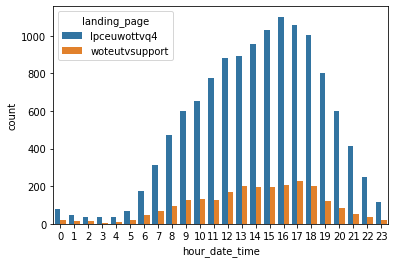

In [49]:
sns.countplot(x = 'hour_date_time', hue = 'landing_page', data = df_1)
plt.show()

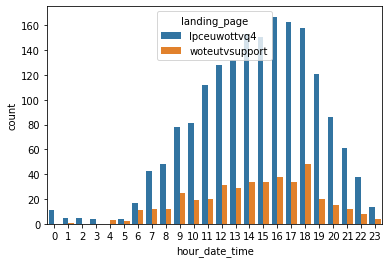

In [50]:
sns.countplot(x = 'hour_date_time', hue = 'landing_page', data = df_2)
plt.show()

In [51]:
df_itog = df[['landing_page','user_id','show_date_time','browser','os_name','country']]
df_itog = df_itog.loc[df_itog['landing_page'] != 'na-carnival-info-page']
df_itog

,landing_page,user_id,show_date_time,browser,os_name,country
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,Chrome,Windows,CZ
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,AndroidBrowser,Linux,DE
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,Microsoft Internet Explorer,Windows,GB
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,Chrome,Windows,PL
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,Microsoft Internet Explorer,Windows,FR
...,...,...,...,...,...,...
15460,lpceuwottvq4,NaN,2015-02-28 22:51:21,Chrome,Windows,CZ
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,Firefox,Windows,DE
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,Opera,Windows,EU
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,Chrome,Windows,TR


In [52]:
brow = df_itog.groupby(['landing_page','browser']).count()[['show_date_time','user_id']]
brow.sort_values(by=['show_date_time'], ascending=False)

show_date_time  user_id
landing_page   browser                                             
lpceuwottvq4   Chrome                                 5498      877
               Firefox                                3039      484
               Microsoft Internet Explorer            2438      290
woteutvsupport Chrome                                 1055      241
               Firefox                                 730      101
lpceuwottvq4   AndroidBrowser                          450       29
               Opera                                   358       77
               Safari                                  340       15
woteutvsupport Microsoft Internet Explorer             303       42
               Safari                                  103        8
               AndroidBrowser                           85        5
               Opera                                    77       14
lpceuwottvq4   GoogleBot                                54        0
               BingBot                                  51        0
woteutvsupport GoogleBot                                29        0
lpceuwottvq4   ChromeiOS                                20        0
woteutvsupport ChromeiOS                                 4        0
lpceuwottvq4   NintendoBrowser                           2        0
woteutvsupport Opera Mobile                              2        0
lpceuwottvq4   SeaMonkey                                 2        1

In [53]:
osn = df_itog.groupby(['landing_page','os_name']).count()[['show_date_time','user_id']]
osn.sort_values(by=['show_date_time'], ascending=False)

show_date_time  user_id
landing_page   os_name                               
lpceuwottvq4   Windows                 10690     1663
woteutvsupport Windows                  2016      387
lpceuwottvq4   Linux                    1016       87
               iOS                       241        1
woteutvsupport Linux                     196       14
lpceuwottvq4   Macintosh                 161       22
woteutvsupport iOS                        77        0
               Macintosh                  48       10
lpceuwottvq4   PlayStation                24        4
               Windows Phone              17        0
woteutvsupport ChromeOS                   12        0
               Windows Phone               7        0
lpceuwottvq4   ChromeOS                    5        1
woteutvsupport PlayStation                 4        1

In [54]:
country = df_itog.groupby(['landing_page','country']).count()[['show_date_time','user_id']]
country.sort_values(by=['show_date_time'], ascending=False)

show_date_time  user_id
landing_page   country                         
lpceuwottvq4   DE                 2713      268
               PL                 2478      477
               TR                 2107      117
               FR                 1861      355
woteutvsupport FI                  993      190
...                                ...      ...
lpceuwottvq4   HU                    1        0
               HT                    1        0
               HN                    1        0
               CO                    1        0
               NI                    1        0

[81 rows x 2 columns]

In [55]:
country['user_id']['woteutvsupport']['FI']

190

In [56]:
len(df[(df['landing_page']=='lpceuwottvq4') & (df['country']=='DE') & (pd.notna(df['user_id']))])

268

In [57]:
def get_value(df: pd.core.frame.DataFrame, col_name: str, col_val: str, lp: str):
    all_users = len(df[(df['landing_page'] == lp) & (df[col_name] == col_val)])
    reg_users = len(df[(df['landing_page']==lp) & (df[col_name]==col_val) & (pd.notna(df['user_id']))])
    if (all_users < 15):
        return(-1)
    return (reg_users / all_users)

def count_coof(coofs):
    i = 0
    itog = 0
    for j in range(3):
        if (coofs[j] != -1):
            itog += coofs[j]
            i+=1
    if (i == 0):
        return 0
    return (itog / i)
            

def recomender(df: pd.core.frame.DataFrame, br: str, os: str, cntry: str):
    lp_br = lp_os = lp_cnt = ws_br = ws_os = ws_cnt = -1
    if (br):
        lp_br = get_value(df, 'browser', br, 'lpceuwottvq4')
        ws_br = get_value(df, 'browser', br, 'woteutvsupport')
    if (os):
        ws_os = get_value(df, 'os_name', os, 'woteutvsupport')
        lp_os = get_value(df, 'os_name', os, 'lpceuwottvq4')
    if (cntry):    
        lp_cnt = get_value(df, 'country', cntry, 'lpceuwottvq4')
        ws_cnt = get_value(df, 'country', cntry, 'woteutvsupport')
    lp = count_coof([lp_br, lp_os, lp_cnt])
    ws = count_coof([ws_br, ws_os, ws_cnt])
    if (lp >= ws):
        return ('lpceuwottvq4')
    return ('woteutvsupport')

In [58]:
df['recomended'] = df.apply(lambda row: recomender(df, row['browser'], row['os_name'], row['country']), axis=1)

In [59]:
df

,landing_page,user_id,show_date_time,browser_version,browser,os_name,country,recomended
0,lpceuwottvq4,NaN,2015-02-01 00:00:46,39.0.2171.65,Chrome,Windows,CZ,woteutvsupport
1,lpceuwottvq4,NaN,2015-02-01 00:04:30,NaN,AndroidBrowser,Linux,DE,lpceuwottvq4
2,lpceuwottvq4,NaN,2015-02-01 00:08:53,11.0,Microsoft Internet Explorer,Windows,GB,woteutvsupport
3,lpceuwottvq4,NaN,2015-02-01 00:28:59,40.0.2214.94,Chrome,Windows,PL,woteutvsupport
4,lpceuwottvq4,NaN,2015-02-01 00:29:11,11.0,Microsoft Internet Explorer,Windows,FR,woteutvsupport
...,...,...,...,...,...,...,...,...
15461,lpceuwottvq4,526736398.0,2015-02-28 22:55:39,33.0,Firefox,Windows,DE,woteutvsupport
15462,na-carnival-info-page,NaN,2015-02-28 23:06:38,40.0.2214.115,Chrome,Windows,TR,woteutvsupport
15463,lpceuwottvq4,NaN,2015-02-28 23:34:32,27.0.1689.76,Opera,Windows,EU,lpceuwottvq4
15464,lpceuwottvq4,526736924.0,2015-02-28 23:37:24,40.0.2214.115,Chrome,Windows,TR,woteutvsupport


In [60]:
df_check = df[['landing_page','user_id','recomended']].dropna(subset=['user_id'])
print(len(df_check))
print(len(df_check[df_check['landing_page'] == df_check['recomended']]))#  поменял, пересчитывать долго
df_check2 = df[['landing_page','user_id','recomended']]
df_check2 = df_check2[pd.isna(df_check2['user_id'])]
print(len(df_check2))
print(len(df_check2[df_check2['landing_page'] != df_check2['recomended']]))

2192
982
13274
8886


In [61]:
def get_coof(data: pd.core.frame.DataFrame,
             table: str, lp: str):
    try:
        all_users = data['show_date_time'][lp][table]
        if (all_users < 15):
            return (-1);
        return (data['user_id'][lp][table] / all_users)
    except KeyError:
        return -1

def count_itog_coof(info):
    coof = 0
    arif = 0
    for i in range(2):
        if (info[i] != -1):
            arif += 1
            coof += info[i]
    if (arif == 0):
        return -1
    return (coof / arif)
def recomender2(brow: pd.core.frame.DataFrame,
                osn: pd.core.frame.DataFrame,
                country: pd.core.frame.DataFrame,
                br: str, os: str, cntry: str):
    lp_br = lp_os = lp_cnt = ws_br = ws_os = ws_cnt = -1
    
    lp_br = get_coof(brow, br, 'lpceuwottvq4')
    lp_os = get_coof(osn, os, 'lpceuwottvq4')
    lp_cnt = get_coof(country, cntry, 'lpceuwottvq4')
    ws_br = get_coof(brow, br, 'woteutvsupport')
    ws_os = get_coof(osn, os, 'woteutvsupport')
    ws_cnt = get_coof(country, cntry, 'woteutvsupport')
    
    lp_coof = count_itog_coof([lp_br, lp_os])
    ws_coof = count_itog_coof([ws_br, ws_os])
    if (lp_coof >= ws_coof):
        return ('lpceuwottvq4')
    return ('woteutvsupport')
        
    
    

In [62]:
brow = df_itog.groupby(['landing_page','browser']).count()[['show_date_time','user_id']]
osn = df_itog.groupby(['landing_page','os_name']).count()[['show_date_time','user_id']]
country = df_itog.groupby(['landing_page','country']).count()[['show_date_time','user_id']]

df['recomended2'] = df.apply(lambda row: recomender2(brow, osn, country, row['browser'], row['os_name'], row['country']), axis=1)

In [63]:
df_check = df[['landing_page','user_id','recomended2']].dropna(subset=['user_id'])
print(len(df_check))
print(len(df_check[df_check['landing_page'] == df_check['recomended2']]))
df_check2 = df[['landing_page','user_id','recomended2']]
df_check2 = df_check2[pd.isna(df_check2['user_id'])]
print(len(df_check2))
print(len(df_check2[df_check2['landing_page'] != df_check2['recomended2']]))

2192
457
13274
10660
